In [17]:
import numpy as np
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [27]:
class SpectralClustering:
    def __init__(self, n_clusters=2, n_componets=None, sigma=1.0):
        self.n_clusters = n_clusters
        self.n_componets = n_componets
        self.sigma = sigma
    def fit(self, X):
        S = self.similarity_matrix(X)
        L = self.graph_laplacian(S)
        eig_vals, eig_vecs = eigsh(L, which='SM')
        Y = eig_vecs
        kmeans = KMeans(n_clusters=self.n_clusters)
        kmeans.fit(Y)
        self.labels = kmeans.labels_
        
    def predict(self, X):
        S = self.similarity_matrix(X)
        L = self.graph_laplacian(S)
        eig_vals, eig_vecs = eigsh(L, which='SM')
        Y = eig_vecs
        return KMeans(n_clusters=self.n_clusters).fit_predict(Y)
    
        
    def similarity_matrix(self, X):
        dist = pairwise_distances(X, metric='euclidean')
        sim_matrix = np.exp(-dist ** 2 / (self.sigma ** 2))
        return sim_matrix
    def graph_laplacian(self, S):
        D = np.diag(np.sum(S, axis=1))
        return D - S
    

C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


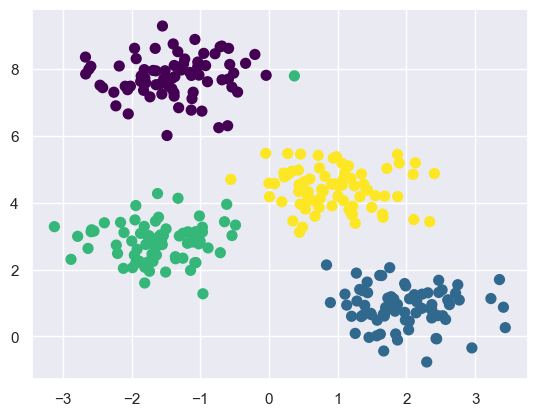

In [29]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


sc = SpectralClustering(n_clusters=4, sigma=1.0)


sc.fit(X)

labels = sc.labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
